In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler

# 1. Read data and basic description

In [96]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [97]:
train_df.head(5).T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [98]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [99]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [100]:
train_df.shape

(1460, 81)

In [101]:
test_df.shape

(1459, 80)

In [102]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

# 2. Missing values

Let's fill NAs with meadian or other values where possible or drop column.

Columns to be filled with 0:
1. LotFrontage - Linear feet of street connected to property. So adding 0 I am saying that some properties do not face the street.
2. MasVnrArea
3. GarageYrBlt - where there is no garage I add 0
4. PoolQC

Columns to be added certain values:
1. Alley - 'No alley access'
2. MasVnrType - 'Nothing'
3. BsmtQual - 'No basement'
4. BsmtCond - 'No basement'
5. BsmtExposure - 'No basement'
6. BsmtFinType1 - 'No basement'
7. BsmtFinType2 - 'No basement'
8. FireplaceQu - 'No fireplace'
9. GarageType - 'No garage'
10. GarageFinish - 'No garage'
11. GarageQual - 'No garage'
12. GarageCond - 'No garage' 
13. Fence - 'No fence'
14. MiscFeature - 'No features'

Columns to be added the most common value
1. Electrical - only one value missing, will add most common value (SBrkr)

In [103]:
values = {
    'LotFrontage': 0,
    'MasVnrArea': 0,
    'GarageYrBlt': 0,
    'PoolQC':0,
    'Alley': 'No alley access',
    'MasVnrType': 'Nothing',
    'BsmtQual': 'No basement',
    'BsmtCond': 'No basement',
    'BsmtExposure': 'No basement',
    'BsmtFinType1': 'No basement',
    'BsmtFinType2': 'No basement',
    'FireplaceQu': 'No fireplace',
    'GarageType': 'No garage',
    'GarageFinish': 'No garage',
    'GarageQual': 'No garage',
    'GarageCond': 'No garage',
    'Fence': 'No fence',
    'MiscFeature': 'No features',
    'Electrical': 'SBrkr'
}

In [104]:
train_df.fillna(value=values, inplace=True)
test_df.fillna(value=values, inplace=True)

In [105]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non

In [106]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non

Some values in train df have missing values. 

In [107]:
print(f"Test dataset size before dropping rows: {test_df.shape}")

Test dataset size before dropping rows: (1459, 80)


In [108]:
test_df = test_df.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [109]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1459 non-null object
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non

# 3. Transforming strings into dummies/ordinal variables

Here the strategy is to transform all the non-numeric data into numeric data:
1. If column has no ordinal meaning - generate dummies
2. If there is some ordering (bad, good, excelent) - convert into ordinal numeric variable.

In [110]:
vars_for_dummies = [
    'MSSubClass',
    'MSZoning',
    'Street',
    'Alley',
    'LotShape',
    'LandContour',
    'Utilities',
    'LotConfig',
    'Neighborhood',
    'Condition1',
    'Condition2',
    'BldgType',
    'HouseStyle',
    'RoofStyle',
    'RoofMatl',
    'Exterior1st',
    'Exterior2nd',
    'MasVnrType',
    'Foundation',
    'Heating',
    'CentralAir',
    'Electrical',
    'GarageType',
    'PavedDrive',
    'MiscFeature',
    'SaleType',
    'SaleCondition'
]

In [111]:
train_df = pd.get_dummies(train_df, prefix=vars_for_dummies, columns=vars_for_dummies, drop_first=False)
train_df.shape

(1460, 248)

In [112]:
test_df = pd.get_dummies(test_df, prefix=vars_for_dummies, columns=vars_for_dummies, drop_first=False)
test_df.shape

(1459, 232)

In [113]:
cat_mapper = {
    'Gtl': 1,
    'Mod': 2,
    'Sev': 3
}
train_df.LandSlope = train_df.LandSlope.replace(cat_mapper)
test_df.LandSlope = test_df.LandSlope.replace(cat_mapper)

In [114]:
cat_mapper = {
    'Po': 1, 
    'Fa': 2, 
    'TA': 3,
    'Gd': 4, 
    'Ex': 5
}
train_df.ExterQual = train_df.ExterQual.replace(cat_mapper)
test_df.ExterQual = test_df.ExterQual.replace(cat_mapper)
train_df.ExterCond = train_df.ExterCond.replace(cat_mapper)
test_df.ExterCond = test_df.ExterCond.replace(cat_mapper)

In [115]:
cat_mapper = {
    'No basement': 1, 
    'Po': 2, 
    'Fa': 3, 
    'TA': 4, 
    'Gd': 5, 
    'Ex': 6
}
train_df.BsmtCond = train_df.BsmtCond.replace(cat_mapper)
train_df.BsmtQual = train_df.BsmtQual.replace(cat_mapper)
test_df.BsmtCond = test_df.BsmtCond.replace(cat_mapper)
test_df.BsmtQual = test_df.BsmtQual.replace(cat_mapper)

In [116]:
cat_mapper = {
    'No basement': 1, 
    'No': 2, 
    'Mn': 3, 
    'Av': 4, 
    'Gd': 5
}
train_df.BsmtExposure = train_df.BsmtExposure.replace(cat_mapper)
test_df.BsmtExposure = test_df.BsmtExposure.replace(cat_mapper)

In [117]:
cat_mapper = {
    'No basement': 1, 
    'Unf': 2, 
    'LwQ': 3, 
    'Rec': 4, 
    'BLQ': 5, 
    'ALQ': 6, 
    'GLQ': 7}
train_df.BsmtFinType1 = train_df.BsmtFinType1.replace(cat_mapper)
train_df.BsmtFinType2 = train_df.BsmtFinType2.replace(cat_mapper)
test_df.BsmtFinType1 = test_df.BsmtFinType1.replace(cat_mapper)
test_df.BsmtFinType2 = test_df.BsmtFinType2.replace(cat_mapper)

In [118]:
cat_mapper = {
    'Po': 1, 
    'Fa': 2, 
    'TA': 3, 
    'Gd': 4, 
    'Ex': 5}
train_df.HeatingQC = train_df.HeatingQC.replace(cat_mapper)
test_df.HeatingQC = test_df.HeatingQC.replace(cat_mapper)
train_df.KitchenQual = train_df.KitchenQual.replace(cat_mapper)
test_df.KitchenQual = test_df.KitchenQual.replace(cat_mapper)

In [119]:
cat_mapper = {
    'Sal': 1, 
    'Sev': 2, 
    'Maj2': 3, 
    'Maj1': 4, 
    'Mod': 5, 
    'Min2': 6, 
    'Min1': 7, 
    'Typ': 8
}
train_df.Functional = train_df.Functional.replace(cat_mapper)
test_df.Functional = test_df.Functional.replace(cat_mapper)

In [120]:
cat_mapper = {
    'No fireplace': 1,
    'Po': 2, 
    'Fa': 3, 
    'TA': 4, 
    'Gd': 5,
    'Ex': 6
}
train_df.FireplaceQu = train_df.FireplaceQu.replace(cat_mapper)
test_df.FireplaceQu = test_df.FireplaceQu.replace(cat_mapper)

In [121]:
cat_mapper = {
    'No garage': 1, 
    'Unf': 2, 
    'RFn': 3, 
    'Fin': 4
}
train_df.GarageFinish = train_df.GarageFinish.replace(cat_mapper)
test_df.GarageFinish = test_df.GarageFinish.replace(cat_mapper)

In [122]:
cat_mapper = {
    'No garage': 1,
    'Po': 2, 
    'Fa': 3, 
    'TA': 4, 
    'Gd': 5, 
    'Ex': 6
}
train_df.GarageQual = train_df.GarageQual.replace(cat_mapper)
train_df.GarageCond = train_df.GarageCond.replace(cat_mapper)
test_df.GarageQual = test_df.GarageQual.replace(cat_mapper)
test_df.GarageCond = test_df.GarageCond.replace(cat_mapper)

In [123]:
cat_mapper = {
    'No pool': 1, 
    'Fa': 2, 
    'TA': 3, 
    'Gd': 4, 
    'Ex': 5
}
train_df.PoolQC = train_df.PoolQC.replace(cat_mapper)
test_df.PoolQC = test_df.PoolQC.replace(cat_mapper)

In [124]:
cat_mapper = {
    'No fence': 1, 
    'MnWw': 2, 
    'GdWo': 3, 
    'MnPrv': 4, 
    'GdPrv': 5
}
train_df.Fence = train_df.Fence.replace(cat_mapper)
test_df.Fence = test_df.Fence.replace(cat_mapper)

Take log of price and square feet of living area:

In [125]:
train_df.SalePrice = np.log(train_df.SalePrice)
train_df.GrLivArea = np.log(train_df.GrLivArea)
test_df.GrLivArea = np.log(test_df.GrLivArea)
train_df.LotArea = np.log(train_df.LotArea)
test_df.LotArea = np.log(test_df.LotArea)

# 4. Feature engineering

It would be great to make columns with dates to help us. I suggest to add the feature that indicates how old is the house at the sale date and similar:
1. The difference in years between YrSold: YrSold and YearBuilt.
2. The difference in years between YrSold: YrSold and YearRemodAdd.

In [126]:
train_df['YrSinceBuilt'] = train_df.YrSold - train_df.YearBuilt
test_df['YrSinceBuilt'] = test_df.YrSold - test_df.YearBuilt

In [127]:
train_df['YrSinceRemodel'] = train_df.YrSold - train_df.YearRemodAdd
test_df['YrSinceRemodel'] = test_df.YrSold - test_df.YearRemodAdd

# 5. Explore data

Let's see the distribution of the sales price:

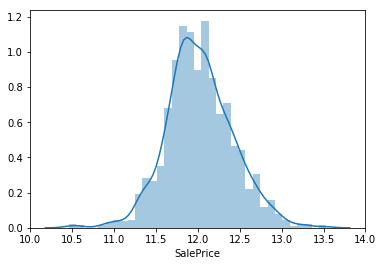

In [128]:
sns.distplot(train_df.SalePrice)

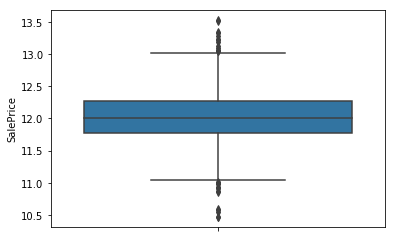

In [129]:
sns.boxplot(y='SalePrice', data = train_df)

Some prices could qualify as an outlier, but nothing severe, so I will not remove any data points.

Let's check square feets of living area:

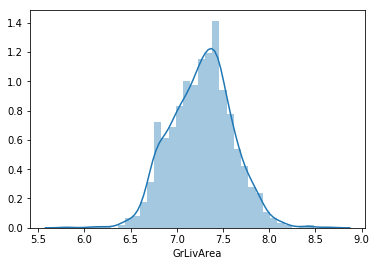

In [130]:
sns.distplot(train_df.GrLivArea)

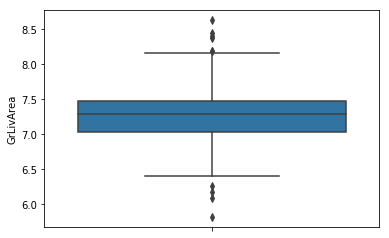

In [131]:
sns.boxplot(y='GrLivArea', data = train_df)

Let's plot the relation of living area with sales price:

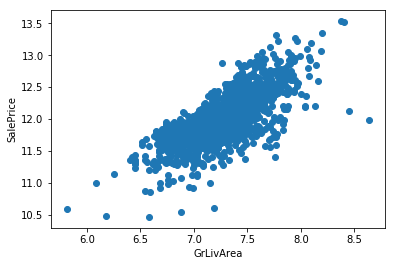

In [132]:
fig, ax = plt.subplots()
ax.scatter(x = train_df.GrLivArea, y = train_df.SalePrice)
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()

In [133]:
train_df.SalePrice.corr(train_df.GrLivArea)

0.7302548511982293

Lets check the age of the building:

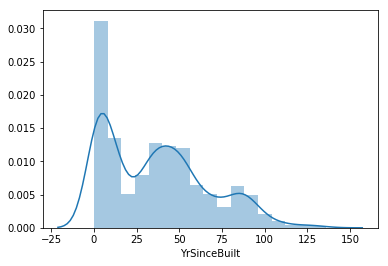

In [134]:
sns.distplot(train_df.YrSinceBuilt)

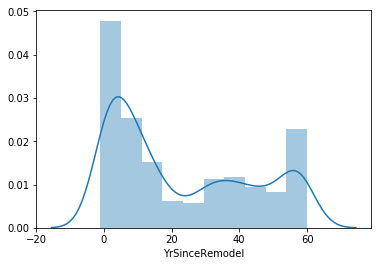

In [135]:
sns.distplot(train_df.YrSinceRemodel)

Quite a lot of new buildings are sold.

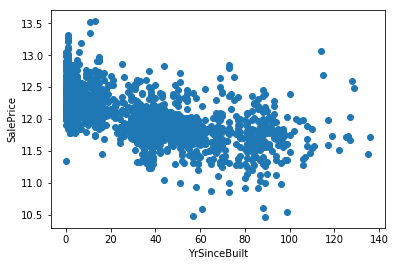

In [136]:
fig, ax = plt.subplots()
ax.scatter(x = train_df.YrSinceBuilt, y = train_df.SalePrice)
plt.ylabel('SalePrice')
plt.xlabel('YrSinceBuilt')
plt.show()

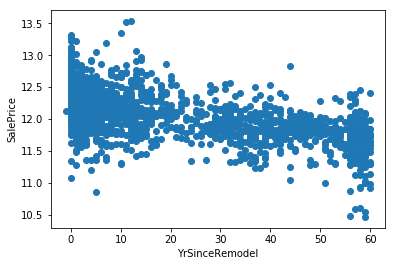

In [137]:
fig, ax = plt.subplots()
ax.scatter(x = train_df.YrSinceRemodel, y = train_df.SalePrice)
plt.ylabel('SalePrice')
plt.xlabel('YrSinceRemodel')
plt.show()

Let's draw pairplots of the selected numeric variables:

In [138]:
numeric_vars = [
    'SalePrice',
    'YrSinceBuilt',
    'YrSinceRemodel',
    'GrLivArea',
    'LotArea',
    'LotFrontage',
    'TotalBsmtSF'
]

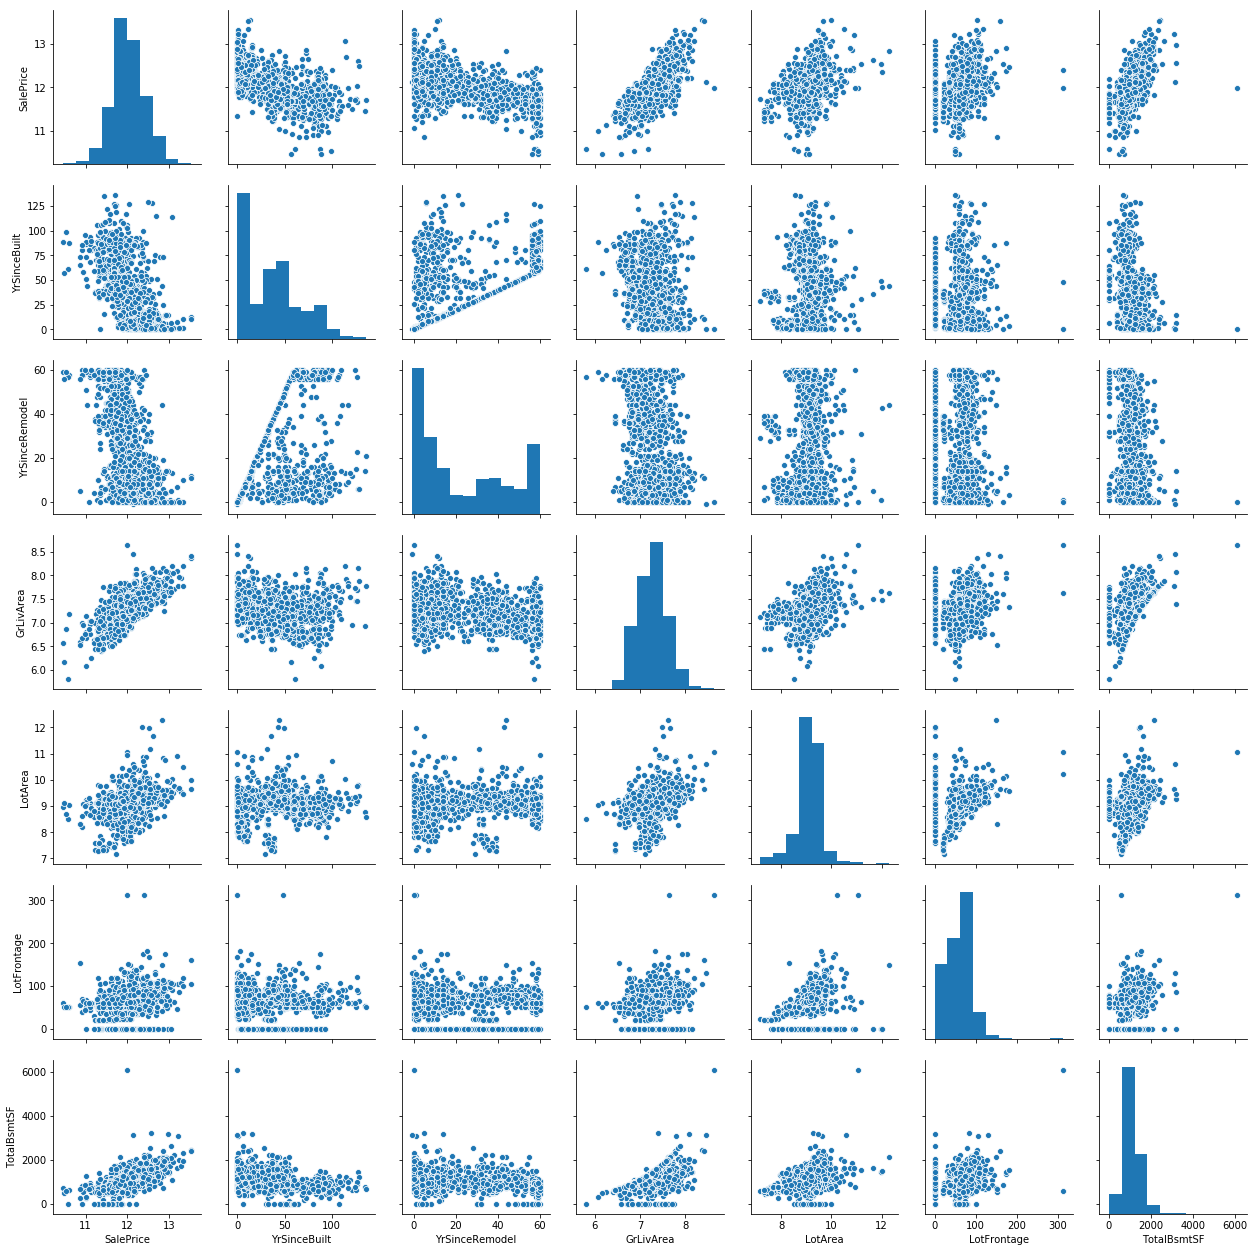

In [139]:
sns.pairplot(train_df[numeric_vars])

# 6. Modelling

In [140]:
irrelevant_for_x = [
    'Id',
    'YearBuilt',
    'YearRemodAdd',
    'SalePrice',
    'MoSold',
    'YrSold',
]

In [141]:
X_train = train_df[train_df.columns[~train_df.columns.isin(irrelevant_for_x)]]

In [142]:
y_train = train_df.SalePrice

In [143]:
X_test = test_df[test_df.columns[~test_df.columns.isin(irrelevant_for_x)]]

In [144]:
print(X_train.shape, X_test.shape)

(1460, 244) (1459, 229)


There are columns of dummies that are present in train dataset but not in test. I add 0 for those vals in test.

In [145]:
cols_for_train_data = X_train.columns[~X_train.columns.isin(X_test.columns)]

In [146]:
for col in cols_for_train_data:
    X_test.loc[:, col] = 0

/home/mindaugas/.local/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/mindaugas/.local/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [147]:
print(X_train.shape, X_test.shape)

(1460, 244) (1459, 245)


In [148]:
X_test.columns[~X_test.columns.isin(X_train.columns)]

Index(['MSSubClass_150'], dtype='object')

In [149]:
X_test.drop(['MSSubClass_150'], axis=1, inplace=True)

In [150]:
#Scaler = RobustScaler()
#X_train = Scaler.fit_transform(X_train)
#X_test = Scaler.fit_transform(X_test)

### 6.1. Lasso with CV 

In [151]:
lasso = linear_model.LassoCV(cv=7, n_alphas=500, fit_intercept=True)
lasso.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=7, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=500, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [152]:
lasso_alpha_path = pd.DataFrame({'alpha': lasso.alphas_, 'avg_mse': np.average(lasso.mse_path_, axis=1)})

In [153]:
lasso_alpha_path.sort_values(by=['avg_mse'], ascending=True).head(10)

,alpha,avg_mse
479,0.141393,0.036996
478,0.143364,0.036996
480,0.139449,0.036996
481,0.137532,0.036996
482,0.135641,0.036996
483,0.133776,0.036996
477,0.145362,0.036996
484,0.131937,0.036997
485,0.130123,0.036997
476,0.147388,0.036997


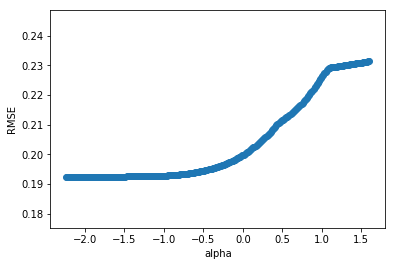

In [154]:
fig, ax = plt.subplots()
ax.scatter(
    x = np.log(lasso_alpha_path[lasso_alpha_path.alpha < 5].alpha), 
    y = np.sqrt(lasso_alpha_path[lasso_alpha_path.alpha < 5].avg_mse))
plt.ylabel('RMSE')
plt.xlabel('alpha')
plt.show()

In [155]:
lasso.alpha_

0.14139262717073625

In [156]:
np.average(cross_val_score(lasso, X_train, y_train, cv=7, scoring='neg_mean_squared_error'))

-0.037114956744173366

In [157]:
lasso_preds_with_CV = lasso.predict(X_test)

Lets try different variants of alpha tunning, e.g. information criteria AIC/BIC. Btw, it is quite surprising that MSE path is essentially decreasing with alpha decreasing, i.e. the larger models do not overparametrize.

### 6.2. Lasso with information criteria

In [158]:
lasso_bic = linear_model.LassoLarsIC(criterion='bic', fit_intercept=True)
lasso_bic.fit(X_train, y_train)

/home/mindaugas/.local/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 102 iterations, i.e. alpha=8.550e-05, with an active set of 96 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/home/mindaugas/.local/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 172 iterations, i.e. alpha=2.592e-05, with an active set of 166 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/home/mindaugas/.local/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 183 iterations, i.e. alpha=1.819e-05, with an active set of 177 regresso

LassoLarsIC(copy_X=True, criterion='bic', eps=2.220446049250313e-16,
            fit_intercept=True, max_iter=500, normalize=True, positive=False,
            precompute='auto', verbose=False)

In [159]:
 lasso_bic.alpha_

0.0006752503915373806

BIC based model suggests even smaller alpha. So far this scored the better than LassoCV on training submission, 0.17.

In [160]:
lasso_preds_bic = lasso_bic.predict(X_test)

In [161]:
np.average(cross_val_score(lasso_bic, X_train, y_train, cv=7, scoring='neg_mean_squared_error'))

/home/mindaugas/.local/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 167 iterations, i.e. alpha=2.392e-05, with an active set of 161 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/home/mindaugas/.local/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 178 iterations, i.e. alpha=1.671e-05, with an active set of 170 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/home/mindaugas/.local/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 246 iterations, i.e. alpha=4.655e-06, with an active set of 208 regress

/home/mindaugas/.local/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 143 iterations, i.e. alpha=5.138e-05, with an active set of 129 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/home/mindaugas/.local/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 148 iterations, i.e. alpha=4.802e-05, with an active set of 132 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/home/mindaugas/.local/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 148 iterations, i.e. alpha=4.802e-05, with an active set of 132 regress

-0.024996528634065273

### 6.3. ElasticNet

In [162]:
elnet = linear_model.ElasticNetCV(n_alphas=500, cv=7)
elnet.fit(X_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=7, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=500, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [163]:
elnet_alpha_path = pd.DataFrame({'alpha': elnet.alphas_, 'avg_mse': np.average(elnet.mse_path_, axis=1)})

In [164]:
elnet_alpha_path.sort_values(by=['avg_mse'], ascending=True).head(10)

,alpha,avg_mse
479,0.282785,0.036996
480,0.278898,0.036996
478,0.286727,0.036996
481,0.275063,0.036996
482,0.271282,0.036997
483,0.267552,0.036997
477,0.290724,0.036997
484,0.263874,0.036997
485,0.260246,0.036997
476,0.294776,0.036998


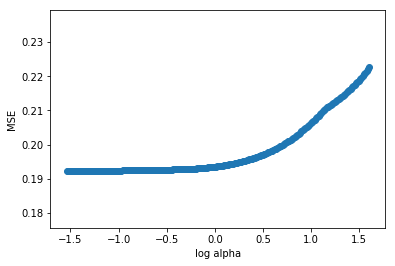

In [200]:
fig, ax = plt.subplots()
ax.scatter(
    x = np.log(elnet_alpha_path[elnet_alpha_path.alpha < 5].alpha), 
    y = np.sqrt(elnet_alpha_path[elnet_alpha_path.alpha < 5].avg_mse))
plt.ylabel('MSE')
plt.xlabel('log alpha')
plt.show()

In [166]:
elnet_preds = elnet.predict(X_test)

In [167]:
np.average(cross_val_score(elnet, X_train, y_train, cv=7, scoring='neg_mean_squared_error')) 

-0.03711683196277389

### 6.4. Random forests 

In [168]:
rf_basic = RandomForestRegressor(n_estimators=200)
rf_basic.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [169]:
np.average(cross_val_score(rf_basic, X_train, y_train, cv=7, scoring='neg_mean_squared_error'))

-0.01964317181773828

In [170]:
rf_basic_preds = rf_basic.predict(X_test)

### 6.4.1. Let's tune RF by controlling parameters 

In [171]:
rf = RandomForestRegressor(n_estimators=200, max_features='sqrt', bootstrap=True)

In [172]:
grid = {
    'min_samples_leaf': [i for i in range(2, 11)],
    'max_depth': [i for i in range(2, 50, 3)]
}

In [173]:
rf_cv = RandomizedSearchCV(
    estimator = rf, 
    param_distributions = grid, 
    n_iter = 10, 
    cv = 7,
    n_jobs = -1)

In [174]:
rf_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=7, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='sqrt',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=200,
                                                   n_jobs=None, oob_score=False,
                                                   random_state=None

In [175]:
np.average(cross_val_score(rf_cv, X_train, y_train, cv=7, scoring='neg_mean_squared_error'))

-0.02141759249597209

In [176]:
rf_cv.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=29,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [177]:
rf_cv.best_params_

{'max_depth': 29, 'min_samples_leaf': 2}

In [178]:
rf_cv.best_score_

0.8674814245337277

In [179]:
rf_cv_preds = rf_cv.predict(X_test)

### 6.6. XGBRegressor 

In [180]:
XGB = XGBRegressor(n_estimators=100, objective='reg:squarederror', n_jobs=-1)
XGB.fit(X_train.values,y_train.values)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [181]:
np.average(cross_val_score(XGB, X_train.values, y_train.values, cv=7, scoring='neg_mean_squared_error'))

-0.016720028783253505

In [182]:
xgb_preds = XGB.predict(X_test.values)

### 6.6. Averging simple 

In [183]:
avg_preds_simple = (
    np.exp(rf_basic_preds) + 
    np.exp(xgb_preds)
)/2

# 7. Submission

Sumbit here: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/submit

In [184]:
def prepare_submission(preds, need_exp=True):
    submission = pd.DataFrame()
    submission['Id'] = test_df.Id
    if need_exp:
        final_predictions = np.exp(preds)
    else:
        final_predictions = preds
    submission['SalePrice'] = final_predictions
    return submission

In [185]:
lasso_submission_with_CV = prepare_submission(lasso_preds_with_CV)
lasso_submission_bic = prepare_submission(lasso_preds_bic)
elnet_submission = prepare_submission(elnet_preds)
rf_basic_sub = prepare_submission(rf_basic_preds)
rf_cv_sub = prepare_submission(rf_cv_preds)
avg_sub = prepare_submission(avg_preds_simple, False)
xgb_sub = prepare_submission(xgb_preds)

In [186]:
lasso_submission_with_CV.to_csv('Lasso_with_CV.csv', index=False)
lasso_submission_bic.to_csv('Lasso_bic.csv', index=False)
elnet_submission.to_csv('elnet.csv', index=False)
rf_basic_sub.to_csv('rf_basic.csv', index=False)
rf_cv_sub.to_csv('rf_cv.csv', index=False)
avg_sub.to_csv('avg.csv', index=False)
xgb_sub.to_csv('xgb.csv', index=False)

# 8. Summary

None of the models produced good results in terms of competition score. XG Boosting was top performer, RF the second. The vest score, however, was the average of two models.

In [188]:
pd.DataFrame({
        'Model': ['Lasso with CV', 'Lasso with BIC', 'Elastic Net', 'Random Forest', 'Random Forest CV', 'XGB', 'Average'],
        'CV accuracy': [
            np.sqrt(-1*np.average(cross_val_score(lasso, X_train, y_train, cv=7, scoring='neg_mean_squared_error'))),
            np.sqrt(-1*np.average(cross_val_score(lasso_bic, X_train, y_train, cv=7, scoring='neg_mean_squared_error'))),
            np.sqrt(-1*np.average(cross_val_score(elnet, X_train, y_train, cv=7, scoring='neg_mean_squared_error'))),
            np.sqrt(-1*np.average(cross_val_score(rf_basic, X_train, y_train, cv=7, scoring='neg_mean_squared_error'))),
            np.sqrt(-1*np.average(cross_val_score(rf_cv, X_train, y_train, cv=7, scoring='neg_mean_squared_error'))),
            np.sqrt(-1*np.average(cross_val_score(XGB, X_train.values, y_train.values, cv=7, scoring='neg_mean_squared_error'))),
            'NA'
        ],
        'Accuracy on test data': [0.29, 0.24, 0.29, 0.177, 0.188, 0.164, 0.152]
    })

/home/mindaugas/.local/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 167 iterations, i.e. alpha=2.392e-05, with an active set of 161 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/home/mindaugas/.local/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 178 iterations, i.e. alpha=1.671e-05, with an active set of 170 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/home/mindaugas/.local/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 246 iterations, i.e. alpha=4.655e-06, with an active set of 208 regress

/home/mindaugas/.local/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 18 iterations, i.e. alpha=1.101e-03, with an active set of 18 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/home/mindaugas/.local/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 45 iterations, i.e. alpha=3.949e-04, with an active set of 41 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/home/mindaugas/.local/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 55 iterations, i.e. alpha=2.637e-04, with an active set of 51 regressors, a

,Model,CV accuracy,Accuracy on test data
0,Lasso with CV,0.192652,0.290
1,Lasso with BIC,0.158103,0.240
2,Elastic Net,0.192657,0.290
3,Random Forest,0.140155,0.177
4,Random Forest CV,0.14761,0.188
5,XGB,0.129306,0.164
6,Average,NA,0.152


Let's see how train and test prediction dictributions look like for RF:

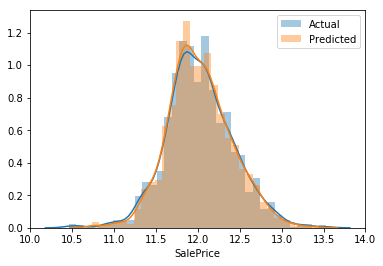

In [194]:
sns.distplot(y_train, label='Actual')
sns.distplot(rf_basic.predict(X_train), label='Predicted')
plt.legend()
plt.show()

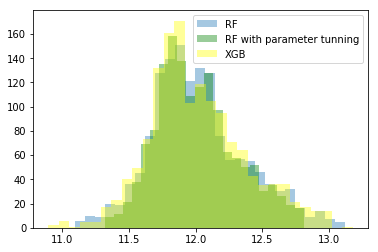

In [199]:
sns.distplot(rf_basic.predict(X_test), label='RF', kde=False)
sns.distplot(rf_cv.predict(X_test), label='RF with parameter tunning', kde=False, color='green')
sns.distplot(XGB.predict(X_test.values), label='XGB', kde=False, color='yellow')
plt.legend()
plt.show()